**Following steps needs to be done as part of this project**:
* Loading Libraries
* Loading Dataset
* Descriptive and Visual analysis
* Statistical analysis
* Train test dataset split
* Fitting regression model
* Evaluate model performance
* Cross Validation of model
* Fine tuning of model

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

Import SqlLite3 package to read the data into a pandas dataframe.

In [2]:
import sqlite3

Import sklearn packages for preprocessing, split the data into train and Test and for modelling.

In [3]:
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

C:\Users\Sreekanth\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from sklearn.preprocessing import Imputer, StandardScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

### Loading Dataset

**Dataset to predict over all football player rating is available at below location**
* https://www.kaggle.com/hugomathien/soccer 

**Copied the dataset to my machine and stored at below location**
* C:\\Users\\Sreekanth\\Documents\\Datascience\\Assignments\\Project 2\\input

In [5]:
conn = sqlite3.connect('C:\\Users\\Sreekanth\\Documents\\Datascience\\Assignments\\Project 2\\input\\database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [6]:
df.head() # Shows the 5 records from the dataset.

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Basic Details about Data
Undersatand the data and check for its datatypes and presence of null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

#### Remove rows with null values as they are less in count

In [8]:
df.dropna(axis = 0, inplace = True)

### Basics statistics of numerical values

In [9]:
pd.set_option("display.precision", 2) ## Display only two decimal points.

In [10]:
df.describe() # Explore the data

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
mean,91995.89,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,...,57.87,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33
std,53092.66,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,...,15.15,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19
min,1.00,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,46074.25,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,92003.50,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,137935.75,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00
max,183978.00,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,97.00,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00


In [11]:
df.shape # Verify the no of rows and columns in the dataset - 180354 columns & 42 columns.

(180354, 42)

In [12]:
df[df.overall_rating == 94].shape # Verify how many records are there with max value of overall rating.

(12, 42)

#### Details of Categorical Columns 

**In the given dataset there are three categorical columns. Below are the three columns.**
* preferred_foot
* attacking_work_rate
* defensive_work_rate

**Verify how they are distributed.**


In [13]:
df.preferred_foot.value_counts()

right    136247
left      44107
Name: preferred_foot, dtype: int64

In [14]:
df.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [15]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

## Visual Analysis

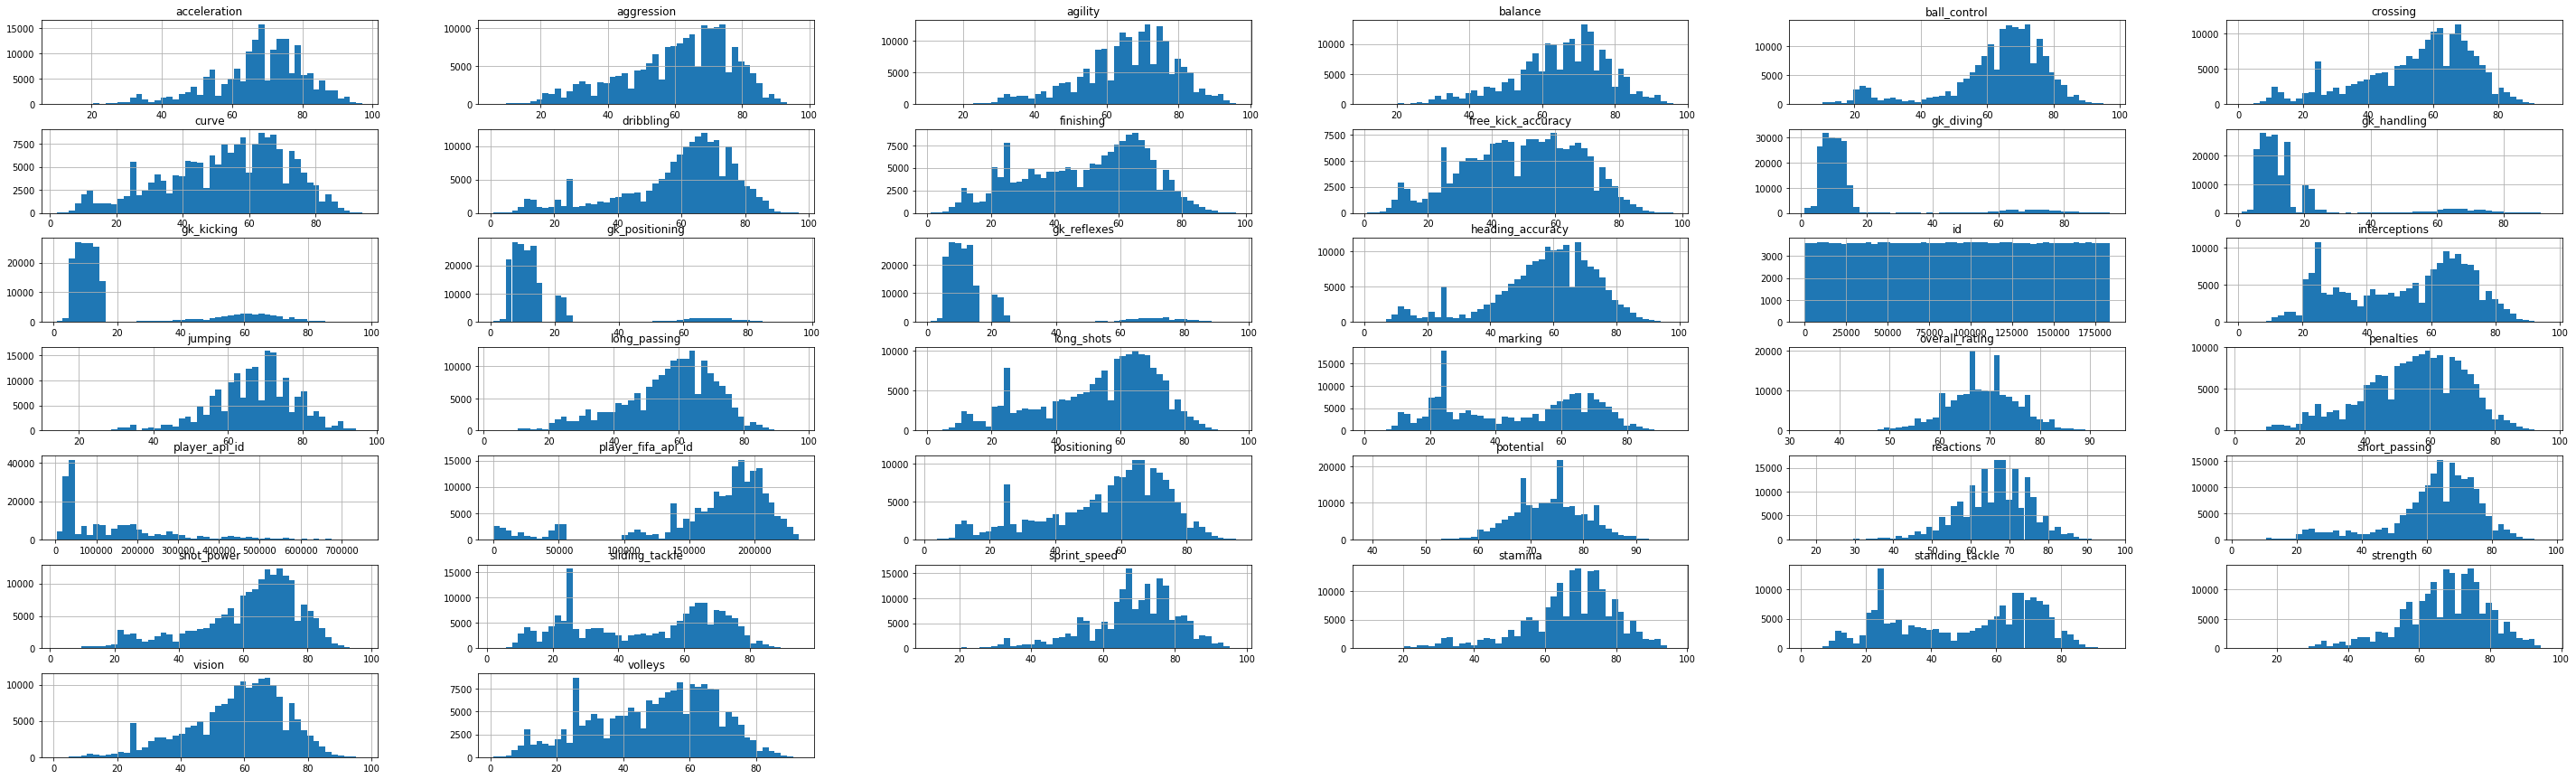

In [16]:
df.hist(bins=50, figsize=(50,15))
plt.show()

In [17]:
df.corr() # see the correlation between the features

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.00e+00,3.74e-03,2.05e-03,-3.74e-03,8.37e-04,-0.02,-8.17e-03,-0.01,-6.70e-03,-6.92e-03,...,-7.93e-03,-1.18e-02,-1.03e-02,-1.25e-02,-1.11e-02,0.01,1.09e-02,8.76e-03,1.40e-02,1.47e-02
player_fifa_api_id,3.74e-03,1.00e+00,5.57e-01,-2.79e-01,-2.13e-02,-0.07,-2.98e-02,-0.10,-6.53e-02,-8.87e-02,...,-1.63e-01,-1.75e-01,-7.56e-02,-7.11e-02,-5.52e-02,-0.09,-1.39e-01,-2.48e-01,-1.41e-01,-1.32e-01
player_api_id,2.05e-03,5.57e-01,1.00e+00,-3.28e-01,1.06e-02,-0.11,-6.23e-02,-0.13,-9.02e-02,-1.31e-01,...,-1.88e-01,-1.62e-01,-8.98e-02,-8.67e-02,-7.36e-02,-0.07,-1.25e-01,-2.30e-01,-1.26e-01,-1.22e-01
overall_rating,-3.74e-03,-2.79e-01,-3.28e-01,1.00e+00,7.65e-01,0.36,3.30e-01,0.31,4.58e-01,3.62e-01,...,4.31e-01,3.93e-01,1.32e-01,1.64e-01,1.28e-01,0.03,6.72e-03,2.88e-02,8.03e-03,7.80e-03
potential,8.37e-04,-2.13e-02,1.06e-02,7.65e-01,1.00e+00,0.28,2.88e-01,0.21,3.83e-01,3.02e-01,...,3.79e-01,3.15e-01,5.41e-02,8.21e-02,6.33e-02,-0.01,5.86e-03,9.23e-02,4.47e-03,4.94e-03
crossing,-2.02e-02,-6.56e-02,-1.13e-01,3.57e-01,2.77e-01,1.00,5.77e-01,0.37,7.90e-01,6.38e-01,...,6.94e-01,5.74e-01,2.35e-01,2.85e-01,2.75e-01,-0.60,-5.96e-01,-3.57e-01,-5.98e-01,-6.02e-01
finishing,-8.17e-03,-2.98e-02,-6.23e-02,3.30e-01,2.88e-01,0.58,1.00e+00,0.37,5.80e-01,8.51e-01,...,6.52e-01,7.26e-01,-2.85e-01,-2.30e-01,-2.62e-01,-0.48,-4.65e-01,-2.92e-01,-4.71e-01,-4.73e-01
heading_accuracy,-1.18e-02,-1.04e-01,-1.30e-01,3.13e-01,2.06e-01,0.37,3.73e-01,1.00,5.48e-01,3.91e-01,...,3.36e-01,4.31e-01,4.61e-01,4.80e-01,4.41e-01,-0.67,-6.49e-01,-4.03e-01,-6.49e-01,-6.52e-01
short_passing,-6.70e-03,-6.53e-02,-9.02e-02,4.58e-01,3.83e-01,0.79,5.80e-01,0.55,1.00e+00,6.40e-01,...,7.66e-01,6.13e-01,3.50e-01,4.15e-01,3.80e-01,-0.69,-6.90e-01,-4.23e-01,-6.91e-01,-6.93e-01
volleys,-6.92e-03,-8.87e-02,-1.31e-01,3.62e-01,3.02e-01,0.64,8.51e-01,0.39,6.40e-01,1.00e+00,...,6.91e-01,7.13e-01,-1.70e-01,-1.08e-01,-1.28e-01,-0.51,-4.86e-01,-2.79e-01,-4.90e-01,-4.92e-01


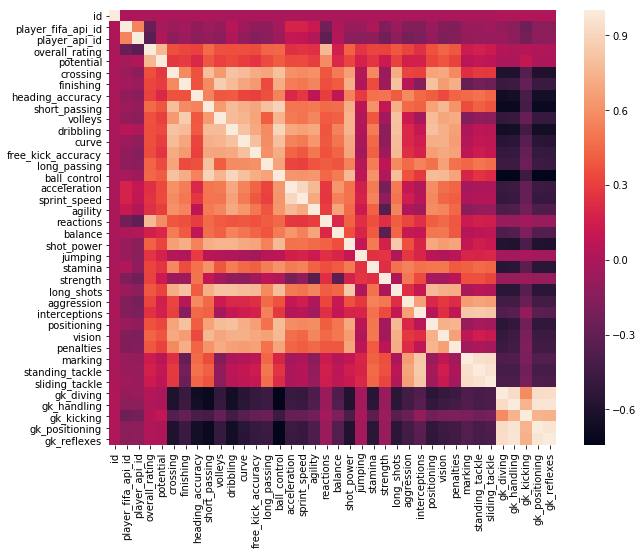

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr()) # Heatmap helps us to identify the correlation between the features.

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean overall_rating')

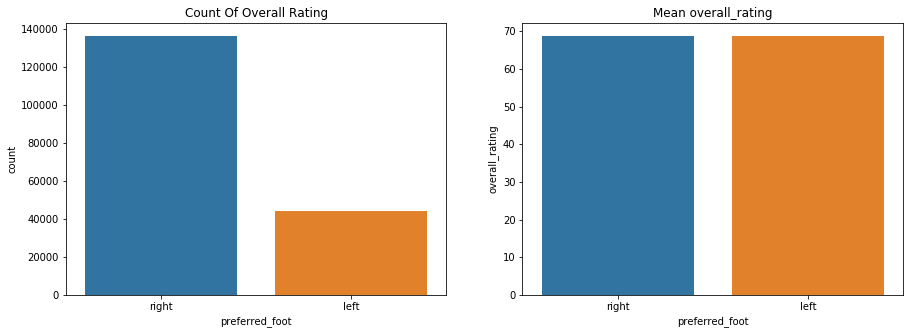

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.preferred_foot)
plt.title('Count Of Overall Rating')
plt.subplot(1,2,2)
sns.barplot(x='preferred_foot', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean overall_rating')

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean overall_rating')

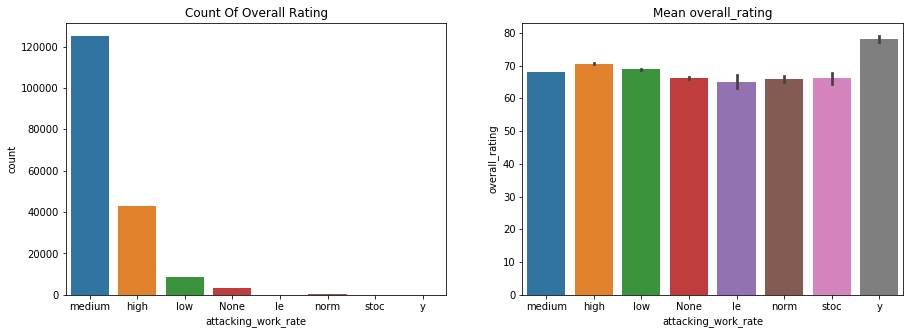

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.attacking_work_rate)
plt.title('Count Of Overall Rating')
plt.subplot(1,2,2)
sns.barplot(x='attacking_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean overall_rating')

C:\Users\Sreekanth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean overall_rating')

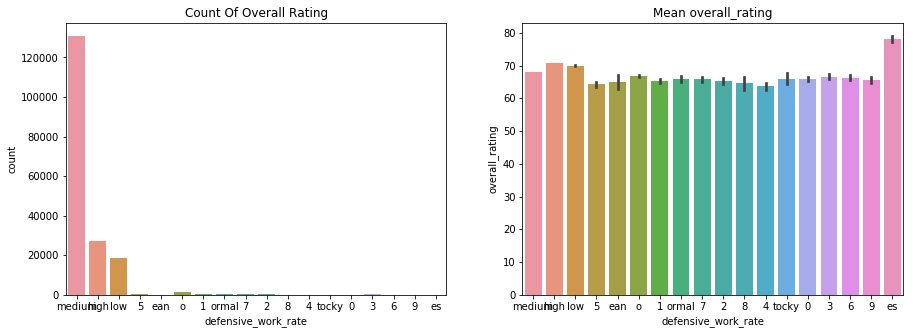

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df.defensive_work_rate)
plt.title('Count Of Overall Rating')
plt.subplot(1,2,2)
sns.barplot(x='defensive_work_rate', y='overall_rating', data=df, estimator=np.mean)
plt.title('Mean overall_rating')

# Statistical Analysis

In [22]:
groups = df.groupby('preferred_foot')
groups.overall_rating.describe()

,count,mean,std,min,25%,50%,75%,max
preferred_foot,,,,,,,,
left,44107.0,68.65,6.67,35.0,64.0,69.0,73.0,94.0
right,136247.0,68.63,7.14,33.0,64.0,69.0,74.0,93.0


In [23]:
groups = df.groupby('attacking_work_rate')
groups.overall_rating.describe()

,count,mean,std,min,25%,50%,75%,max
attacking_work_rate,,,,,,,,
None,3317.0,66.24,6.19,42.0,63.00,67.0,70.00,84.0
high,42823.0,70.59,6.79,35.0,66.00,71.0,75.00,94.0
le,78.0,65.09,9.07,41.0,61.25,66.0,71.75,83.0
low,8569.0,68.89,6.72,41.0,65.00,69.0,73.00,88.0
medium,125070.0,68.02,7.01,33.0,64.00,68.0,73.00,94.0
norm,317.0,65.84,8.45,44.0,61.00,65.0,73.00,85.0
stoc,86.0,66.06,8.09,47.0,62.00,66.5,71.00,83.0
y,94.0,78.14,4.27,71.0,75.00,78.0,80.00,92.0


In [24]:
groups = df.groupby('defensive_work_rate')
groups.overall_rating.describe()

,count,mean,std,min,25%,50%,75%,max
defensive_work_rate,,,,,,,,
0,188.0,65.94,4.90,52.0,64.00,67.0,69.00,76.0
1,421.0,65.24,6.10,45.0,61.00,67.0,70.00,79.0
2,334.0,65.31,8.10,41.0,60.00,65.0,71.00,83.0
3,243.0,66.67,5.24,52.0,64.00,66.0,70.00,82.0
4,116.0,63.70,6.27,47.0,61.00,64.0,67.00,75.0
5,231.0,64.27,5.71,53.0,60.00,64.0,71.00,76.0
6,179.0,66.30,5.56,54.0,62.00,66.0,71.00,77.0
7,207.0,65.83,5.37,48.0,63.00,66.0,69.00,78.0
8,70.0,64.70,7.94,45.0,59.00,63.0,69.00,78.0


# Train and Test Split

#### One Hot Encoding

One Hot Encoding is the process of splitting categorical levels to multiple columns

In [25]:
df_new = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
df_new.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
df_new.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2',

#### Drop id & date columns which are not required for the model building.

In [27]:
df_new  = df_new.drop(['id', 'date'], axis=1)

In [28]:
df_new.head()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,0,0,0,0,0,1,0,0,0
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,0,0,0,0,0,1,0,0,0
2,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,0,0,0,0,0,0,1,0,0,0
3,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,0,0,0,0,0,0,1,0,0,0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df_new.describe() # Explore after implementing one - hot encoding.

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,1.80e+05,1.80e+05,1.80e+05,1.80e+05,180354.00,180354.0,180354.00,1.80e+05,1.80e+05,1.80e+05
mean,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,59.27,...,3.88e-04,7.93e-04,4.32e-04,5.21e-04,0.15,0.1,0.73,7.36e-03,1.76e-03,4.77e-04
std,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,17.74,...,1.97e-02,2.81e-02,2.08e-02,2.28e-02,0.36,0.3,0.45,8.55e-02,4.19e-02,2.18e-02
min,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,1.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,0.00,0.00e+00,0.00e+00,0.00e+00
25%,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,52.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,0.00,0.00e+00,0.00e+00,0.00e+00
50%,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,64.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,1.00,0.00e+00,0.00e+00,0.00e+00
75%,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,72.00,...,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,1.00,0.00e+00,0.00e+00,0.00e+00
max,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,97.00,...,1.00e+00,1.00e+00,1.00e+00,1.00e+00,1.00,1.0,1.00,1.00e+00,1.00e+00,1.00e+00


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 65 columns):
player_fifa_api_id            180354 non-null int64
player_api_id                 180354 non-null int64
overall_rating                180354 non-null float64
potential                     180354 non-null float64
crossing                      180354 non-null float64
finishing                     180354 non-null float64
heading_accuracy              180354 non-null float64
short_passing                 180354 non-null float64
volleys                       180354 non-null float64
dribbling                     180354 non-null float64
curve                         180354 non-null float64
free_kick_accuracy            180354 non-null float64
long_passing                  180354 non-null float64
ball_control                  180354 non-null float64
acceleration                  180354 non-null float64
sprint_speed                  180354 non-null float64
agility                      

### Create Independent/Input and Dependent/output  variables

In [31]:
X = df_new.drop('overall_rating', axis = 1) # remove target variable from datset and assign to new variable X
y = df_new['overall_rating'] # get the target variable and assign to y.

# Imputing target funtion

In [32]:
y.isnull().values.sum()

0

In [33]:
y.describe()

count    180354.00
mean         68.64
std           7.03
min          33.00
25%          64.00
50%          69.00
75%          73.00
max          94.00
Name: overall_rating, dtype: float64

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.3000e+01, 9.2000e+01,
        1.3700e+02, 2.7800e+02, 5.1000e+02, 1.2280e+03, 1.7900e+03,
        2.5000e+03, 3.9630e+03, 6.0410e+03, 9.4210e+03, 1.3460e+04,
        1.8012e+04, 2.0027e+04, 2.0550e+04, 1.9134e+04, 1.8569e+04,
        1.5750e+04, 1.1129e+04, 7.4480e+03, 4.8930e+03, 2.8050e+03,
        1.4350e+03, 7.4100e+02, 2.2300e+02, 8.3000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

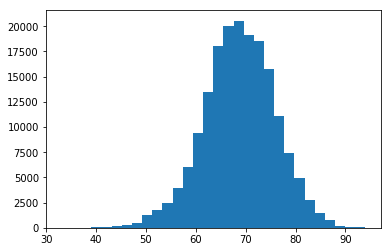

In [34]:
plt.hist(y, 30, range=(33, 94))

In [35]:
y = y.fillna(y.mean())

In [36]:
y.isnull().values.any()

False

As tree model doesn't gets affected by missing values present in data set. but feature selection by SelectFromModel can not be done on datasets that carries null value. Therefore, we should also perform imputation on dataset.

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=10)

In [38]:
print(train_X.shape)
print(train_y.shape)

(144283, 64)
(144283,)


In [39]:
print(test_X.shape)
print(test_y.shape)

(36071, 64)
(36071,)


In [40]:
print(train_X.notna().count())
print(test_X.notna().count())

player_fifa_api_id            144283
player_api_id                 144283
potential                     144283
crossing                      144283
finishing                     144283
heading_accuracy              144283
short_passing                 144283
volleys                       144283
dribbling                     144283
curve                         144283
free_kick_accuracy            144283
long_passing                  144283
ball_control                  144283
acceleration                  144283
sprint_speed                  144283
agility                       144283
reactions                     144283
balance                       144283
shot_power                    144283
jumping                       144283
stamina                       144283
strength                      144283
long_shots                    144283
aggression                    144283
interceptions                 144283
positioning                   144283
vision                        144283
p

# Fitting Regression Model:

In [41]:
lm = LinearRegression() # initialize linear regression model

In [42]:
model = lm.fit(train_X, train_y) # build the model usit sklearn fit .

In [43]:
list(zip(train_X.columns, model.coef_)) # Get the co-efficients of the independent variables.

[('player_fifa_api_id', -8.618747768051336e-06),
 ('player_api_id', -6.395095618471466e-06),
 ('potential', 0.4471992380351497),
 ('crossing', 0.006678813589575838),
 ('finishing', 0.014442160944608859),
 ('heading_accuracy', 0.05577466150124197),
 ('short_passing', 0.056408488060107884),
 ('volleys', -0.006772540843398345),
 ('dribbling', 0.009281371713611541),
 ('curve', 0.012191471790030144),
 ('free_kick_accuracy', 0.007355065457397669),
 ('long_passing', 0.010621327806799537),
 ('ball_control', 0.11124584791802755),
 ('acceleration', 0.011679477313902425),
 ('sprint_speed', 0.015314532105422454),
 ('agility', -0.010724126730579195),
 ('reactions', 0.17640918577286008),
 ('balance', 0.00505492290027351),
 ('shot_power', 0.013347156046057414),
 ('jumping', 0.011347888587811883),
 ('stamina', -0.0020570266891726287),
 ('strength', 0.05089541011773159),
 ('long_shots', -0.011141297896066382),
 ('aggression', 0.010563565982636747),
 ('interceptions', 0.0039218520699081105),
 ('position

In [44]:
model.intercept_ # intercept tells where the line is intersecting the y axis.

0.24259431331056192

In [45]:
model.score(train_X, train_y) # Scores give accuracy. Evaluate for trained split set

0.8612280316333322

In [46]:
model.score(test_X, test_y) # Evaluate score for test split set.

0.8589264888750066

## Evaluate Model Performance

In [47]:
from sklearn.metrics import mean_squared_error
import math

In [48]:
train_pred_y = model.predict(train_X) # predict for train data using the above trained model.

In [49]:
test_pred_y = model.predict(test_X) # predict for test data using the above trained model.

In [50]:
print('RMSE Train', math.sqrt(mean_squared_error(train_pred_y, train_y)))
print('RMSE Test' , math.sqrt(mean_squared_error(test_pred_y, test_y)))

RMSE Train 2.6148679936527515
RMSE Test 2.652462738345239


In [51]:
train_pred_y.shape # get the no of rows present in train data set.

(144283,)

In [52]:
train_y.shape

(144283,)

In [53]:
df_new.overall_rating.mean()  # verify what is the mean of overall rating in complete dataset.

68.63531720948801

#### Visualize the predicted data

In [54]:
import matplotlib.pyplot as plt

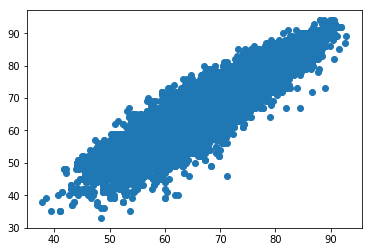

In [55]:
plt.scatter(train_pred_y, train_y) # Verify how the predicted data vs actual overall rating against train data.

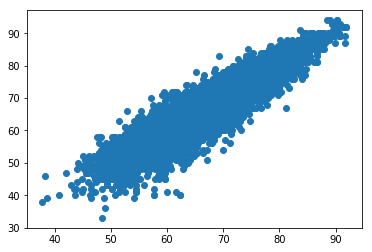

In [56]:
plt.scatter(test_pred_y, test_y) # Verify how the predicted data vs actual overall rating against test data.

(array([1.8000e+01, 5.5000e+01, 2.1800e+02, 1.3520e+03, 6.7710e+03,
        2.2995e+04, 4.4558e+04, 4.0476e+04, 1.8334e+04, 6.3440e+03,
        2.0430e+03, 7.2400e+02, 2.0500e+02, 1.2700e+02, 3.8000e+01,
        1.1000e+01, 9.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-13.5059759 , -11.56971968,  -9.63346346,  -7.69720724,
         -5.76095103,  -3.82469481,  -1.88843859,   0.04781763,
          1.98407384,   3.92033006,   5.85658628,   7.7928425 ,
          9.72909871,  11.66535493,  13.60161115,  15.53786737,
         17.47412358,  19.4103798 ,  21.34663602,  23.28289224,
         25.21914845]),
 <a list of 20 Patch objects>)

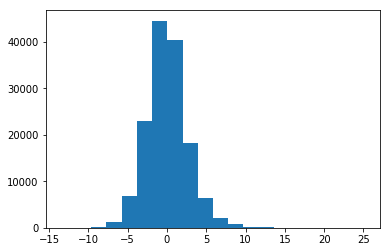

In [57]:
plt.hist( train_pred_y - train_y, bins=20)

(array([5.0000e+00, 1.8000e+01, 2.8000e+01, 1.7900e+02, 7.9800e+02,
        3.0690e+03, 7.7040e+03, 1.1137e+04, 7.9100e+03, 3.2750e+03,
        1.2040e+03, 4.3500e+02, 1.9000e+02, 6.0000e+01, 3.6000e+01,
        1.1000e+01, 6.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([-13.79542196, -11.98807572, -10.18072948,  -8.37338324,
         -6.566037  ,  -4.75869076,  -2.95134452,  -1.14399829,
          0.66334795,   2.47069419,   4.27804043,   6.08538667,
          7.89273291,   9.70007915,  11.50742538,  13.31477162,
         15.12211786,  16.9294641 ,  18.73681034,  20.54415658,
         22.35150282]),
 <a list of 20 Patch objects>)

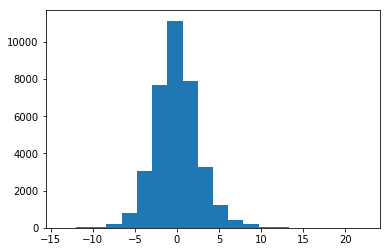

In [58]:
plt.hist(test_pred_y - test_y, bins=20)

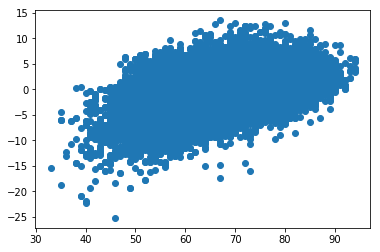

In [59]:
plt.scatter(train_y, train_y - train_pred_y)

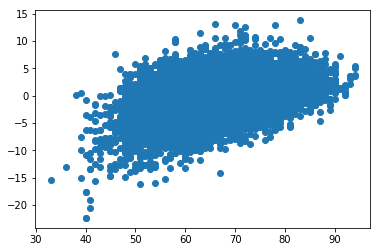

In [60]:
plt.scatter(test_y, test_y - test_pred_y)

In [61]:
pd.DataFrame.from_dict({'predicted':train_pred_y, 'actual':train_y}) # disct the difference between actual and predicted.

,actual,predicted
115226,77.0,76.19
92022,71.0,68.61
180178,73.0,74.83
118575,78.0,74.23
102648,62.0,65.10
47255,88.0,83.63
76650,82.0,79.42
163660,72.0,73.65
67709,69.0,68.18
112962,70.0,68.09


### Validate the dataset against different regressors.

In [62]:
models = {'linre': LinearRegression(),
          'dtree': DecisionTreeRegressor(),
          'randf': RandomForestRegressor(),
          'gbmmo': GradientBoostingRegressor()
          }

In [63]:
error = []
scores = []

for (name, model) in models.items():
    model.fit(train_X, train_y)
    pred_test_y = model.predict(test_X)
    scores.append((name, model.score(test_X, test_y)))
    error.append((name, mean_squared_error(pred_test_y, test_y)))
    

In [64]:
error

[('gbmmo', 3.1783654603703315),
 ('linre', 7.0355585783099235),
 ('dtree', 1.7954109110584437),
 ('randf', 1.0304791228420231)]

In [65]:
scores

[('gbmmo', 0.9362690012254067),
 ('linre', 0.8589264888750066),
 ('dtree', 0.9639993160008651),
 ('randf', 0.9793373466538248)]

In [66]:
randf = models['randf'] # Random forest regression is better.

In [67]:
pd.DataFrame.from_dict({'cols':train_X.columns, 'impt':randf.feature_importances_}).sort_values(by='impt', ascending=False)

,cols,impt
16,reactions,4.84e-01
2,potential,2.34e-01
12,ball_control,5.21e-02
29,standing_tackle,4.11e-02
31,gk_diving,1.59e-02
0,player_fifa_api_id,1.56e-02
5,heading_accuracy,1.35e-02
1,player_api_id,1.28e-02
32,gk_handling,1.05e-02
25,positioning,9.71e-03


## Cross Validation Scores

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(models['randf'], X, y, cv=10, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores)

Cross-validated scores: [-2.66699239 -2.47929076 -2.53561867 -2.63078466 -2.48689935 -2.78875166
 -2.51187159 -2.67528749 -2.66845059 -2.53726575]


In [69]:
scores.std() 

0.09725785085831827

In [70]:
scores.mean()

-2.598121290903028